## common troubleshooting solutions:

1. make sure your file paths use these slashes / and end with a / 

3. are you in the righ file paths?
4. is your info file the same name as your tif file?

### NOTE: This is a 'cleaned' copy of the OMM_Analysis from the lab's github I made from running data from ONI using TIFF files. If you have something  else, this is not for you.   
  
    

## OMM Analysis

In [1]:
import sys
import os
import pandas as pd

sys.path.append(r'D:/Jerry/code/OMMxDORA-tomerge/sma/') #if you are not amanda, change to your sma file path (found in zipfile downloaded from github)
from DisplayHist import disp_hist
from ffpdax import ffp_dax
from ffptif import ffp_tif
import DORA

analysisPath=r'D:/Jerry/DATA/localization_precision_dev_data/20230126_bases_forjerry/10hz_25laser-1_PC/pos_0/'

xmlName='ORBIT_Analysis_Settings'

analysisName='test'
exp_title = "Localization_Precision"
xmlFilename=analysisPath+xmlName
filename=analysisPath+analysisName
# ffp_tif(filename,xmlFilename)

# TRJ file to CSV

In [ ]:
import os
newpath = filename+'trcsv'
if not os.path.exists(newpath):
    os.makedirs(newpath)    #makes a new folder in with same name as filename but ending in trcsv
    
from tr2csv import tr_2csv
tr_2csv(filename)           #Generates CSV file from .tr files      

# 2D Histogram



In [ ]:
import numpy as np

histInfoName=filename+'trdir/histpar' # opens the infromation file
histInfoFile = open(histInfoName+'.info','rb')
histInfo=np.fromfile(histInfoFile,dtype='int32')
histInfoFile.close()
print("Number of peaks")
print(histInfo[3])
histInfo[3]

In [ ]:
#display settings for tracjectories
histPerCol=5
histPerRow=5

print("Displaying")
print(histPerRow*histPerCol)

In [ ]:
#when you run this, you should get a pop up window. check your windows bar at the bottom of the deskstop  
import numpy as np
from PIL import Image
import argparse
import cv2


[refptnp,refsc,refcol,sum_of_rows, out]=disp_hist(filename,histPerCol,histPerRow) #change for dax
print('pk, t1 ,t2')
print(out)


In [3]:
#Remeber python indexs from 0 so if you want your first selection to be the peak you analyze pick 0
#also the peaks go in paired sets, the first two selections will be "peak 0"

chosenpk=0

#pk=str(out[chosenpk*2,0]).zfill(5)
#frStart=out[chosenpk*2,1]
#frEnd=out[((chosenpk*2)+1),2] 
#print("Peak: "+pk)
#print("Start: "+str(frStart))
#print("End: "+str(frEnd))

pk=str(16).zfill(5)
csvpath=filename+'trcsv/'
csvnum=csvpath+pk+'.csv'
print(csvnum)

D:/Jerry/DATA/localization_precision_dev_data/20230126_bases_forjerry/10hz_25laser-1_PC/pos_0/testtrcsv/00016.csv


# DORA Graphing

### Step 1: Input graphing parameters

In [4]:
#universal parameters
exp_tag = exp_title + pk # a tag that caries the name of the experiment
file_name = csvnum  
pixel_size = 117  # in nanometers
time_step = 100  # miliseconds per frame in trajectory movie
frame_start = 0  # enter 0 to start from beginning of dataset
frame_end = -1  # enter -1 to end at the last value of the data set
cmap = "spring_r" # enter a color map string from this https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
cmappx = "Sunsetdark" # color map string from https://plotly.com/python/builtin-colorscales/
first_zero_end = 'no'  # yes to cut off all values after first 0,0 = x,y
graph_centers = "yes" #'yes' or 'no' to graphing the centers of the data. 


#downsampling parameters
bin_size = 10  # bin size for downsample/filter processing
processing = "downsample"  # enter downsample, moving average, or none

#Plot Parameters

#Which Graph?
plot_type = "2Dpx"
# Graphing options:
    # Trajectory Maps:
    # 2D: Colorful 2D visulization of the rotor from above
    # 2Dpx: 2D in plotly express instead of matplotlib
    # 3D: 2D plot but time is an axis

    # Grid plot
    # grid: a grid of little snippets of the data

    # Angular Analysis:

    #         By Jerry
    # radius_filter: Demarcate the excluded data points that will be eliminated from calculations
    # find_excluded_angle: Indicate excluded angles within angular_continuous by Jerry
    # angular_continuous_filtered: Angular Continuous recalculated with excluded points filtered. Excluded points skips indicated.
    # basal3: Graphs tailored for the basal graph analysis 3/14/2022
    # Angular Continuous with a downsampled curve as well. still has bugs with excluded type labelling

    #         By Claire:  [NOT DONE]
    # angular: angle vs time, but it's not cummulative and resets at 360 to 0 (Claire)
    # angular_continuous: Claire's Calculation of a cummulative angle
    # find_excluded_angle_CR: Indicate excluded angles within angular_continuous by Claire's calculations

    # Animation   [NOT DONE]
    # interactive: Interactive graph
    # animated: animated trajectory in notebook
    # HTML: Animated trajectory in a new window. May run better

##### Trajectory Maps Parameters:

# "yes" enables center display of center coordinates if 2D or Find excluded angle
display_center = "no"

expected_radius = 60 # displays expected ORBIT circular trajectory of given radius (nm)

#Labels
x_axis_label = "x (nm)"
y_axis_label = "y (nm)"
z_axis_label = "Time (ms)"  
unit = "nm"  # enter pixel or nm

#Formatting parameters
pixel_min = -0.75  # setting min/max axis range (pixel)
pixel_max = 0.75
marker_size = 15

# change axis increments for nicely fitting tick marks (pixel)
axis_increment_pixel = 7
# change axis increments for nicely fitting tick marks (nm)
axis_increment_nm = 50
nm_min = -150  # setting min/max axis range (nm)
nm_max = 150
#Do you want to save your plot?
save_plot = 'yes'

#########Angle Versus Time (AVT or avt) Graphs

#       Formatting parameters for 'radius filter plot'
rad_filter_type_lower = 'nm'  # enter 'zscore' or 'nm' for choice
rad_filter_type_upper = 'zscore'  # enter 'zscore' or 'nm' for choice
z_up = 3  # enter an upper bound for z score.
z_down = -3  # enter a lower bound for z score
dist_low = 30  # lower bound for ABS of Radius filter
dist_high = 70  # upper bound for ABS of Radius filter

#       Formatting parameters for 'angular_continuous_filtered' plot
# enter 'line' or 'scatter' for a line graph or a scatter plot. Line plot makes up points when hovered
graph_style = 'line'


#Formatting parameters 'grid' plot
frames_per_plot = 20  # refers to grid plot
columns = 7  # columns of plots (grid plot)
fig_size_x = 10 # adjust display parameters for graphs to fit nicely, mostly used for 'grid' plot
fig_size_y  = 10 # adjust display parameters for graphs to fit nicely, mostly used for 'grid' plot

#Formatting parameters 'animation' plot
frame_speed = 20  # for animation only (ms)
tail_length = 50  # for animation only

#DORA.table parameters: 
save_table = 'no' #saves filtered table if "yes"

#DORA.collect_variable parameter package
###DataTable = avt_good cannot have bc it has not been defined yet
col = "Delta Angle"
sample_conditions= analysisName
name_saving_folder = "Data Tables"

### Step 2: Find Center of Peak

I have saved the picture with the name:
Algorithm_Center_Guess_Localization_Precision00016_centering.png


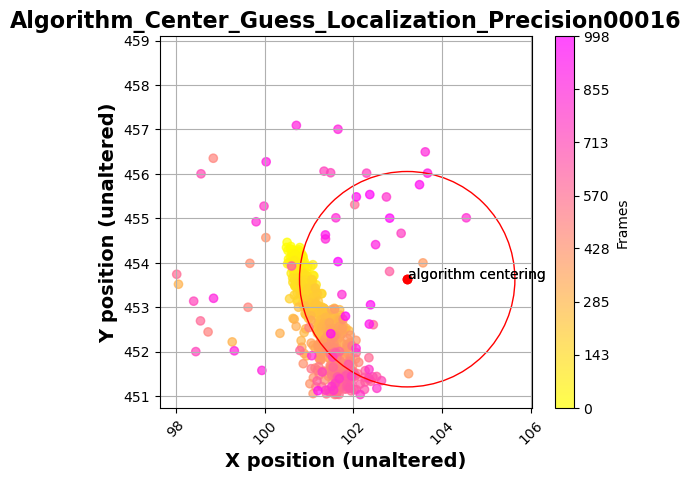

The center is (103.21114909892178, 453.63009643554693)
If the center is satisfactory, change the find_center_coordinates parameter to no
If the center is unsatisfactory, adjust the frame_start and frame_end parameters and try again


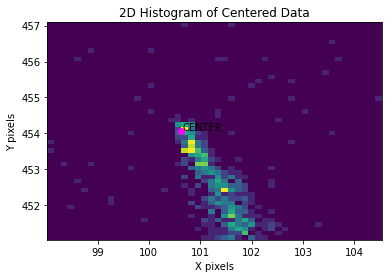

In [5]:
initial_parameters = [file_name, time_step, frame_start, frame_end, cmap, exp_tag, first_zero_end, graph_centers,save_plot]
center, data, ind_invalid_reading, data_back, my_rad_estimate = DORA.find_center(*initial_parameters)

# NEW CENTERING ALGORITHM WITH LOW RES HIST

#section x and y data
x = data["X position"]
y = data["Y position"]

# select arbitrary bin value:
bin_num = 50
center_OR = DORA.find_center_hist_max(x, y, bin_num)

### Step 3: Downsample Data

In [6]:
## Overide center

#option 1: Use Histograph Centering
# center = center_OR

#option 2: Mannually Overide Center
center = [101,453]

#option 3: Continue with normal centering algorithm by commenting out above options

In [7]:
downsample_parameters = [bin_size, processing, data, center, time_step, pixel_size, frame_start, frame_end]
if processing == "downsample":
    down_sampled_df,frame_start,frame_end = DORA.downsample(*downsample_parameters)
else:
    down_sampled_df = DORA.downsample(*downsample_parameters)

### Step 4: Graph Data

In [8]:
#Graph Groupings:
# create a list of the acceptable groupings for the trajectory maps
trajectory_map = ["2D", "2Dpx", "3D"]

# create a list of the acceptable groupings for the Angle Time grouping
AngleTime = ["radius_filter", "find_err_angle", "angular_continuous_filtered",
                "basal3", "angular", "angular_continuous", "find_err_angle_CR"]

# create a list of the acceptable groupings for the Animations Grouping

animations = ["interactive", "animated", "HTML"]


#Trajectory map parameters:
tajectory_map_parameters = [file_name, down_sampled_df, plot_type, display_center, expected_radius, x_axis_label, y_axis_label, z_axis_label, unit, 
pixel_min, pixel_max, axis_increment_nm, axis_increment_pixel, nm_min, nm_max, save_plot, frame_start, frame_end, time_step,cmap,exp_tag,cmappx,marker_size]

#Angle Versus Time (AVT or avt) parameters:
avt_parameters = [file_name, down_sampled_df, plot_type, display_center, ind_invalid_reading, rad_filter_type_upper,
                  rad_filter_type_lower, z_up, z_down, dist_high, dist_low, graph_style, bin_size, frame_start, frame_end,
                  display_center, exp_tag, x_axis_label, y_axis_label, z_axis_label, unit, pixel_min, pixel_max,
                  axis_increment_nm, axis_increment_pixel, nm_min, nm_max, save_plot, data_back, cmap, exp_tag] 

#Animated Parameters
animated_parameters = [file_name, down_sampled_df, plot_type, display_center, ind_invalid_reading, rad_filter_type_upper,
                  rad_filter_type_lower, z_up, z_down, dist_high, dist_low, graph_style, bin_size, frame_start, frame_end,
                  display_center, exp_tag, x_axis_label, y_axis_label, z_axis_label, unit, pixel_min, pixel_max,
                  axis_increment_nm, axis_increment_pixel, nm_min, nm_max, save_plot, data_back, cmap, exp_tag, frame_speed, tail_length] 

#Grid Parameters
grid_parameters = [file_name, down_sampled_df, plot_type, display_center, exp_tag, x_axis_label, y_axis_label, z_axis_label, unit, 
pixel_min, pixel_max, axis_increment_nm, axis_increment_pixel, nm_min, nm_max, save_plot, frame_start, frame_end, time_step,cmap,exp_tag, 
frames_per_plot, columns, fig_size_x, fig_size_y]


# #DORA.graph(plot_type,*relevant_parameters)

if plot_type in trajectory_map:
    %matplotlib notebook
    DORA.graph(plot_type,*tajectory_map_parameters)
if plot_type in animations:
    %matplotlib notebook
    DORA.graph(plot_type,*animated_parameters)
if plot_type == "grid":
    DORA.graph(plot_type, *grid_parameters)
if plot_type in AngleTime:
    DORA.graph(plot_type,*avt_parameters)


    


### Step 5: Animate Plots

In [ ]:
### Choose animation plot parameters ###
cmap_name = "plasma_r"
tail_length = 50
frame_speed_ms = 20

### Imports for the code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import ticker
from IPython.display import HTML

### Allocate X and Y data into dataframe called coords ###

# import matplotlib
import matplotlib.pyplot as plt
# allows for animation to animate
%matplotlib notebook

# establish coordinate dataframe
coords = down_sampled_df[["X displacement (nm)", "Y displacement (nm)"]].copy()
coords = coords.rename(columns={"X displacement (nm)": "x", "Y displacement (nm)": "y"})

### Make an initial graph ###
fig, ax = plt.subplots(1,1,figsize = (5,5))

# plot title and font configurations

# take the file name and separate from the extension
# the first value in the tuple is the number
# the second is .csv 
# the number 00086.csv is the peak --> so this code takes the peak number
pk = os.path.splitext(file_name)[0]

graph_type = 'Animated' 

# change title order!!! 
list_of_strings = [graph_type, exp_tag]

#in quotes is the the delimiter between the items in the string
# by default it is a _ 
my_title = "_".join(list_of_strings)

plt.title(my_title, fontweight='bold', fontsize=16)
ax.set_title(my_title, fontweight = 'bold', fontsize = 16)
ax.set_xlabel("X (nm)",fontweight = 'bold', fontsize = 12)
ax.set_ylabel("Y (nm)",fontweight = 'bold', fontsize = 12)

# set graph limit conditions depending on unit specified
if unit == "pixel":
    ax.set_xlim(pixel_min, pixel_max)
    ax.set_ylim(pixel_min, pixel_max)
    ax.yaxis.set_major_locator(
        ticker.LinearLocator(axis_increment_pixel))
    ax.xaxis.set_major_locator(
        ticker.LinearLocator(axis_increment_pixel))
if unit == "nm":
    ax.set_xlim(nm_min, nm_max)
    ax.set_ylim(nm_min, nm_max)
    ax.yaxis.set_major_locator(
        ticker.LinearLocator(axis_increment_nm))
    ax.xaxis.set_major_locator(
        ticker.LinearLocator(axis_increment_nm))
ax.grid()
sc = ax.scatter([], [])

### Define animation function ###

# animation function feeds a window of dataframe values into the graphing function at a time,
# iterates over user specified range in dataframe with user specified tail length
# color of animation is also specified here
def animate(count):
    sc.set_offsets(np.c_[coords.x.values[count-tail_length:count],coords.y.values[count-tail_length:count]])
    cmap = plt.get_cmap(cmap_name)
    norm = plt.Normalize(vmin=0, vmax=tail_length)
    z = np.array(range(tail_length))
    c = cmap(norm(z))
    sc.set_color(c)
    
    # [UNDER DEVELOPMENT]animated colorbar still under development
#     # Create or update colorbar
#     if not hasattr(animate, "cbar"):
#         # Create colorbar if it does not exist
#         animate.cbar = plt.colorbar(sc, cmap = cmap_name)
#         animate.cbar.set_label('Time (frames)')
# #         animate.cbar.set_ticks(range(tail_length+1))
#     else:
#         # Update colorbar with current frame data
#         animate.cbar.mappable.set_clim(vmin=0, vmax=tail_length)
#         animate.cbar.draw_all()

#     return sc
    
    #button_ax = plt.axes([.78, .87, .1, .07]) # creates an outline for a potential button
ani = FuncAnimation(fig, animate, interval= frame_speed_ms, frames = len(coords)) #frames=len(df)
            #ani.toggle(ax=button_ax)# potential button toggle for a potential button ;)
plt.tight_layout()
plt.show()
# Display the animation as HTML
HTML(ani.to_jshtml())

## Ignore Below Cells unless you are jerry

### Below cells are for loading test data and for troubleshooting


In [ ]:
# Block to insert OMM processes csv's

# sys.path.append(r"D:\Jerry\code\OMMxDORA-tomerge\test_set")
os.chdir(r"D:\Jerry\code\OMMxDORA-tomerge\test_set")
exp_tag = "RecBCD_placeholder_intensity" # a tag that caries the name of the experiment
file_name = "RecBCD_placeholder_intensity.csv" 
analysisName = None

In [ ]:
#Load already downsampled df
down_sampled_df  = pd.read_csv("./test_set/small_csv_batch/trimmed_csv/OrbitBiotin500Hz100Lz_1k_00001_trimmed.csv")